In [1]:
import json



In [12]:
input_file = '../data/output/unpatterns/P19_bert-large-cased-Trex_sm.json'

In [13]:
with open(input_file, 'r') as f:
    data = json.load(f)

In [14]:
data.keys()

dict_keys(['[X] was born in [Y].', '[X] was married in [Y].'])

In [17]:
data['[X] was born in [Y].'].keys()

dict_keys(['data', 'predictions'])

In [21]:
data['[X] was born in [Y].']['predictions'][0]

[{'sequence': '[CLS] Allan Peiper was born in Vienna. [SEP]',
  'score': 0.1382654905319214,
  'token': 5337,
  'token_str': 'Vienna'},
 {'sequence': '[CLS] Allan Peiper was born in Berlin. [SEP]',
  'score': 0.08819528669118881,
  'token': 3206,
  'token_str': 'Berlin'},
 {'sequence': '[CLS] Allan Peiper was born in Munich. [SEP]',
  'score': 0.047068849205970764,
  'token': 6947,
  'token_str': 'Munich'},
 {'sequence': '[CLS] Allan Peiper was born in Germany. [SEP]',
  'score': 0.04091975837945938,
  'token': 1860,
  'token_str': 'Germany'},
 {'sequence': '[CLS] Allan Peiper was born in London. [SEP]',
  'score': 0.03444024920463562,
  'token': 1498,
  'token_str': 'London'}]

In [19]:
base_pattern = '[X] was born in [Y].'
other_pattern = '[X] was married in [Y].'

In [33]:
base_probs = []
other_probs = []

for ind, data_row in enumerate(data[base_pattern]['data']):
    obj = data_row['obj_label']
    
    if data[base_pattern]['predictions'][ind][0]['token_str'] == obj:
        true_pattern_prob = data[base_pattern]['predictions'][ind][0]['score']
        base_probs.append(true_pattern_prob)
    
    if data[other_pattern]['predictions'][ind][0]['token_str'] == obj:
        other_pattern_prob = data[other_pattern]['predictions'][ind][0]['score']
        other_probs.append(other_pattern_prob)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

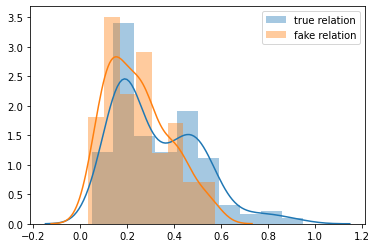

In [41]:
sns.distplot(np.array(base_probs), label='true relation')
sns.distplot(np.array(other_probs), label='fake relation')

plt.legend();


In [38]:
len(base_probs)

210

In [39]:
len(other_probs)

147